In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


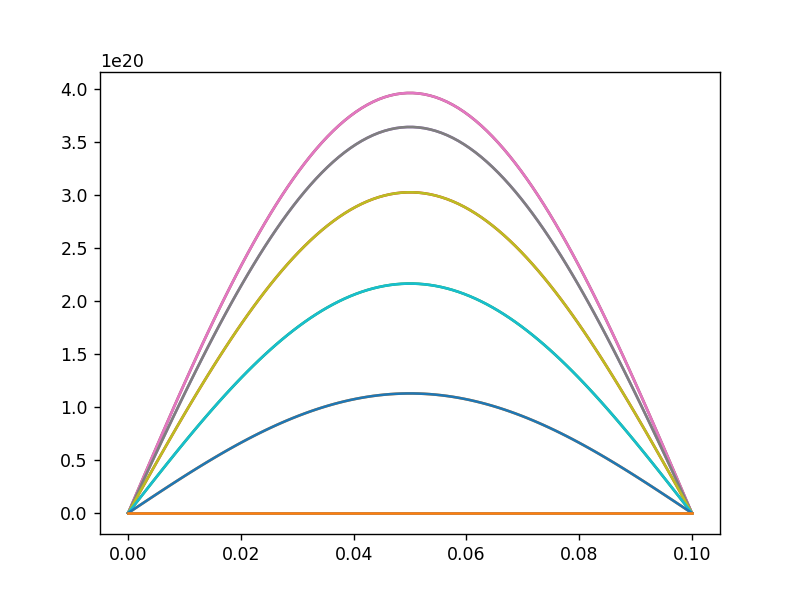

In [2]:
L = 0.1
tp = 100e-3
n0 = 4e20
pi = np.pi
epsi0 = 8.8541878e-12
me = 9.109e-31
q = 1.6022e-19
def ne(x, t):
    return n0*np.sin(pi*t/tp)*np.sin(pi*x/L)

xarray = np.linspace(0, L, 100)
tarray = np.linspace(0, tp, 12)

for t in tarray:
    net = ne(xarray, t)
    plt.plot(xarray, net)

In [3]:
wp = np.sqrt(n0*q**2/(epsi0*me))
c = 3e8
f_red = 4.61e14
w_red = 2*pi*f_red
nc_red = (2*pi*f_red)**2*me*epsi0/q**2
print('wp: ', wp/1e9, 'billion radians per second')
print('fp: ', wp/(2*pi)/1e9, 'GHz')
print('n_c: ', nc_red/1e27, ' m^-3')
prefactor_red = w_red*n0*2*L/(2*nc_red*c*pi)
print(prefactor_red)

wp:  1128.3322657722892 billion radians per second
fp:  179.57965754773804 GHz
n_c:  2.6360130989003734  m^-3
0.04663608590739388


In [4]:
f_CH = 2.52e12
w_CH = 2*pi*f_CH
nc_CH = (2*pi*f_CH)**2*me*epsi0/q**2
print('n_cCH: ', nc_CH/1e22, ' m^-3')

n_cCH:  7.876745160834425  m^-3


In [5]:
c = 3e8
alpha = w_CH*n0*2*L/(2*nc_CH*c*pi)
print(alpha)

8.531442699725625


<IPython.core.display.Javascript object>


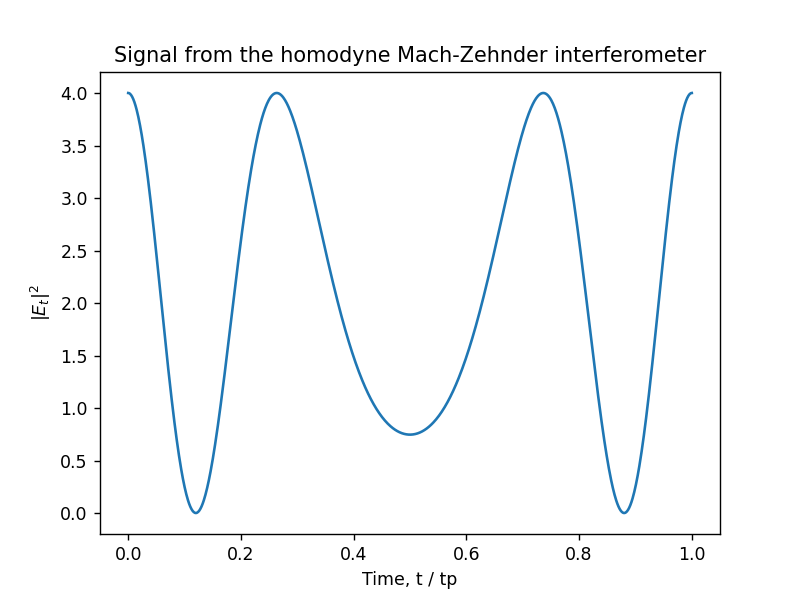

Text(0.5, 1.0, 'Signal from the homodyne Mach-Zehnder interferometer')

In [6]:
tarray = np.linspace(0, tp, 1000)
Et_sqr = 2 + 2*np.cos(alpha*np.sin(pi*tarray/tp))
plt.plot(tarray/tp, Et_sqr)
plt.ylabel(r'$|E_t|^2$')
plt.xlabel('Time, t / tp')
plt.title('Signal from the homodyne Mach-Zehnder interferometer')

<IPython.core.display.Javascript object>


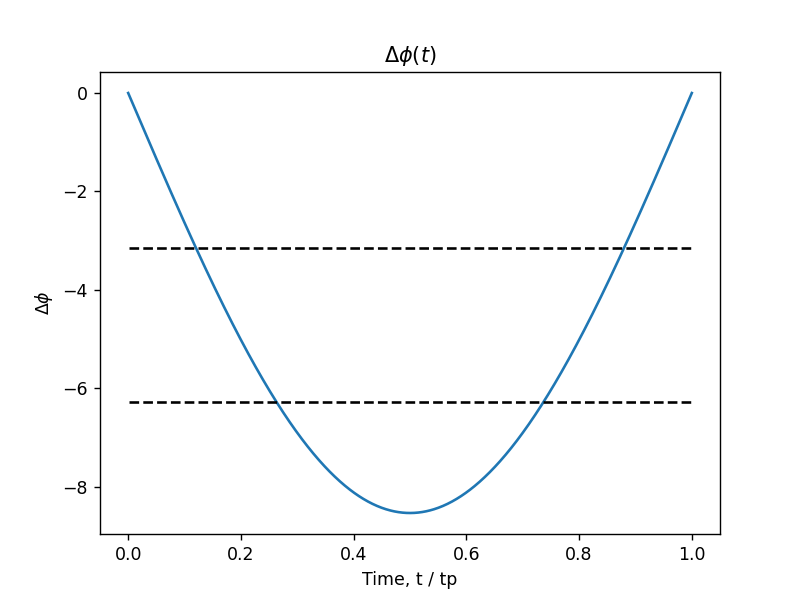

C:\Users\jacob\AppData\Local\Temp\ipykernel_23096\2234634184.py:3: RuntimeWarning: invalid value encountered in divide
  plt.plot(tarray/tp, -pi*tarray/tarray, 'k--')
C:\Users\jacob\AppData\Local\Temp\ipykernel_23096\2234634184.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(tarray/tp, -2*pi*tarray/tarray, 'k--')


Text(0.5, 1.0, '$\\Delta \\phi (t)$')

In [7]:
%matplotlib notebook
plt.plot(tarray/tp, -alpha*np.sin(pi*tarray/tp))
plt.plot(tarray/tp, -pi*tarray/tarray, 'k--')
plt.plot(tarray/tp, -2*pi*tarray/tarray, 'k--')
plt.ylabel(r'$\Delta \phi$')
plt.xlabel('Time, t / tp')
plt.title(r'$\Delta \phi (t)$')

In [8]:
w2 = w_CH
w1 = w_CH - 1e5
w2_minus_w1 = w2 - w1
# print(w2_minus_w1)
# T = 1/(w2_minus_w1 - 1e3)
# print(w2_minus_w1*T - 2*pi)

In [9]:
tarray = np.linspace(0, tp, 100000)
dphi = -alpha*np.sin(pi*tarray/tp)
Esq = 2 + 2*np.cos(w2_minus_w1*tarray + dphi)
from scipy import signal
find_peaks = signal.find_peaks
peakIndices, _ = find_peaks(Esq, height = 1.5)
offset = 0
print(peakIndices.shape)

(1591,)


<IPython.core.display.Javascript object>


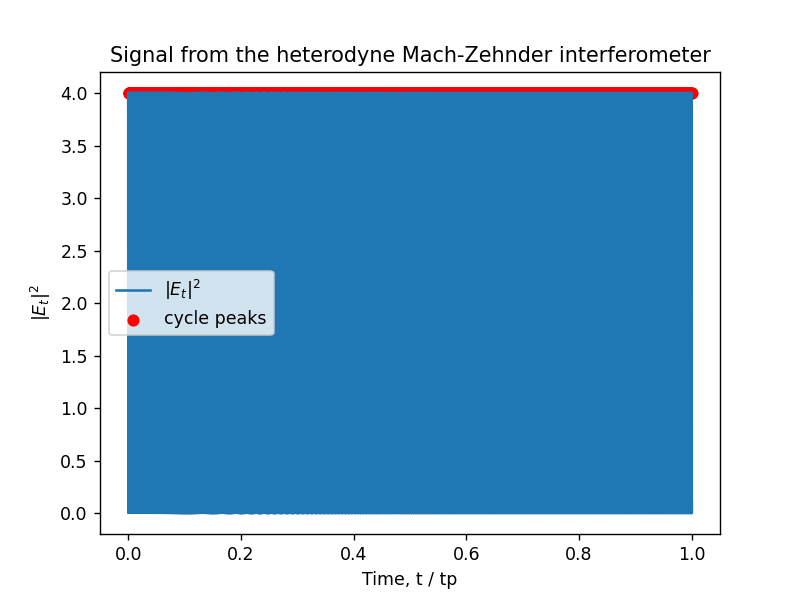

In [10]:
plt.plot(tarray/tp, Esq, label=r'$|E_t|^2$')
plt.scatter(tarray[peakIndices]/tp, Esq[peakIndices], color='red', label='cycle peaks')
plt.ylabel(r'$|E_t|^2$')
plt.xlabel('Time, t / tp')
plt.title('Signal from the heterodyne Mach-Zehnder interferometer')
plt.legend()

(1591,)
(1590,)


<IPython.core.display.Javascript object>


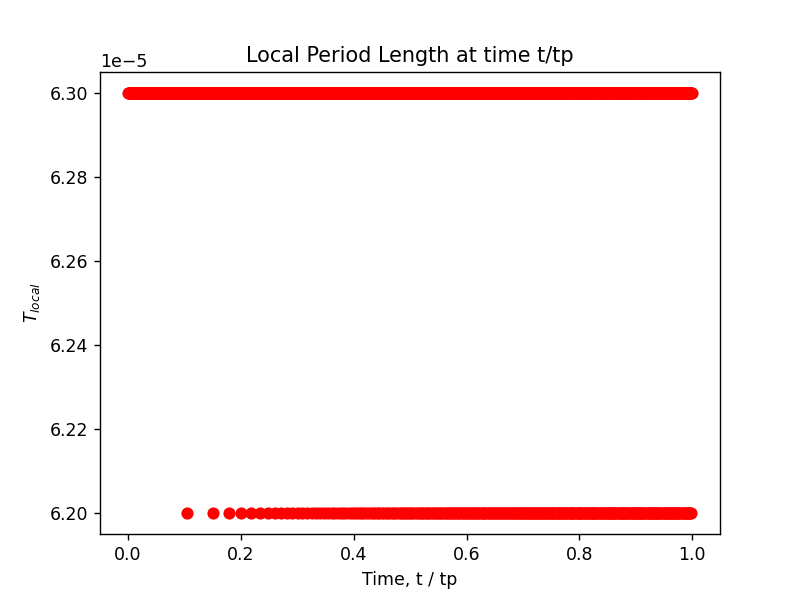

Text(0.5, 1.0, 'Local Period Length at time t/tp')

In [11]:
T_holder = np.array([])
t_delpeaks = np.array([])
t_peaks = tarray[peakIndices]
print(t_peaks.shape)
for i in range(peakIndices.shape[0]-1):
        T_holder = np.append(T_holder, np.abs(t_peaks[i+1]-t_peaks[i]))
        t_delpeaks = np.append(t_delpeaks, t_peaks[i])
print(T_holder.shape)        
plt.scatter(t_delpeaks/tp, T_holder, color='red')
plt.ylabel(r'$T_{local}$')
plt.xlabel('Time, t / tp')
plt.title('Local Period Length at time t/tp')
#plt.scatter(np.arange(0, T_holderl.shape[0]), T_holderl)

<IPython.core.display.Javascript object>


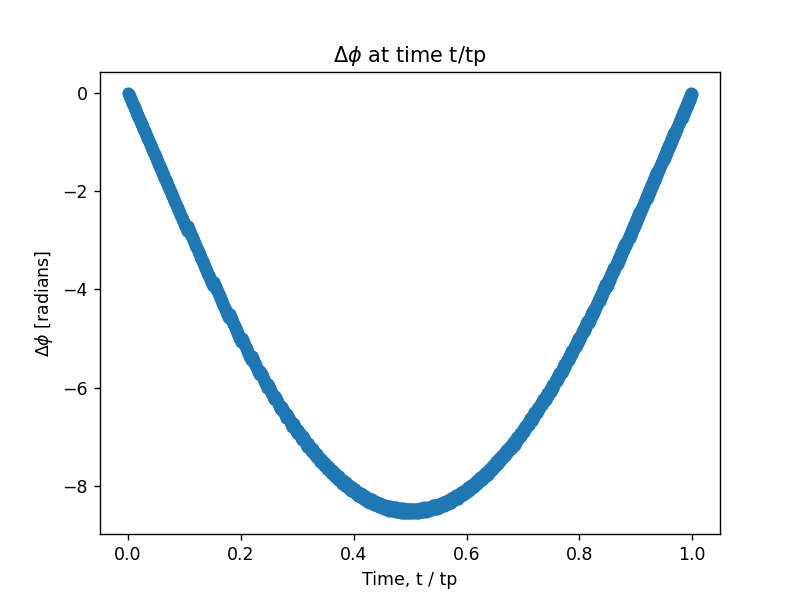

Text(0.5, 1.0, '$\\Delta \\phi$ at time t/tp')

In [12]:
delphi_array = np.array([0])
for i in range(T_holder.shape[0]):
    delphi = delphi_array[i] - w2_minus_w1*T_holder[i] + 2*pi
    delphi_array = np.append(delphi_array, delphi)
plt.scatter(t_delpeaks/tp, delphi_array[:-1])
plt.ylabel(r'$\Delta \phi$ [radians]')
plt.xlabel('Time, t / tp')
plt.title(r'$\Delta \phi$ at time t/tp')

<IPython.core.display.Javascript object>


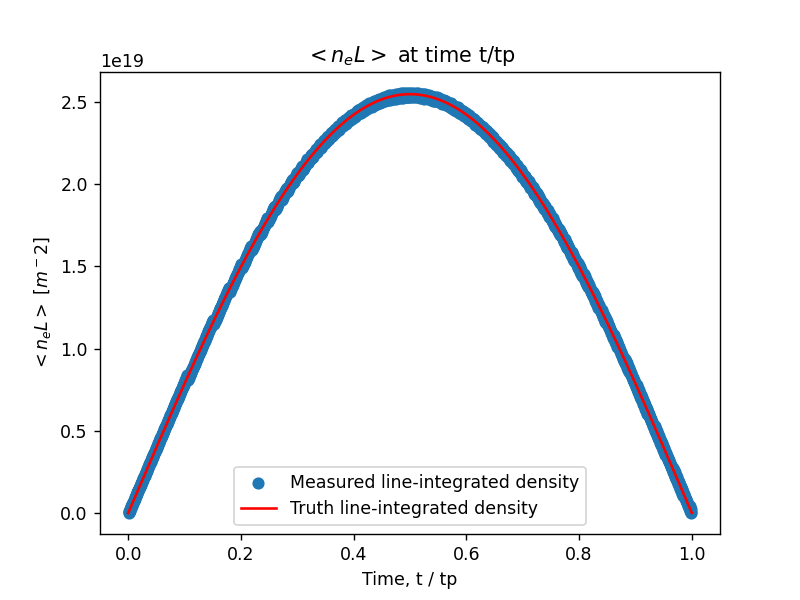

Text(0.5, 1.0, '$<n_e L>$ at time t/tp')

In [13]:
measured_neL = -2*nc_CH*c*delphi_array[:-1]/w2
plt.scatter(t_delpeaks/tp, measured_neL, label='Measured line-integrated density')
plt.plot(tarray/tp, n0*2*L*np.sin(pi*tarray/tp)/pi, color='red', label='Truth line-integrated density')
plt.legend()
plt.xlabel('Time, t / tp')
plt.ylabel(r'$<n_e L>$ [$m^-2$]')
plt.title(r'$<n_e L>$ at time t/tp')

<IPython.core.display.Javascript object>


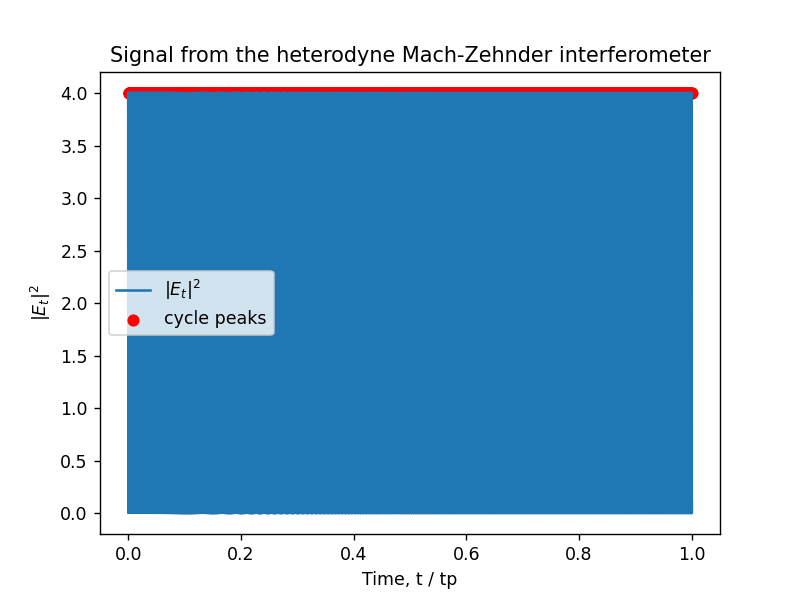

In [14]:
plt.plot(tarray/tp, Esq, label=r'$|E_t|^2$')
plt.scatter(tarray[peakIndices]/tp, Esq[peakIndices], color='red', label='cycle peaks')
plt.ylabel(r'$|E_t|^2$')
plt.xlabel('Time, t / tp')
plt.title('Signal from the heterodyne Mach-Zehnder interferometer')
plt.legend()

In [82]:
wp = w_CH
kp = wp / c
L = 0.1
W = 0.2
H = 0.5
xarray = np.linspace(0, L, 1000)
yarray = np.linspace(0, W, 1000)
Xmesh, Ymesh = np.meshgrid(xarray, yarray)
print(kp)
lam = 2*pi/kp
print(lam)

52778.75658030852
0.00011904761904761905


In [95]:
def get_Esq(x, y, z, theta):
    delphi = -w_CH*H*n0*np.sin(pi*x/L)*np.sin(pi*y/W)/(c*nc_CH*pi)
    #return 2 + 2*np.cos( z*(kp*(1 - np.cos(theta)) + delphi) )
    print('max of kp*y*sin(theta)', np.max(np.abs(kp*y*np.sin(theta))))
    print('---')
    print('max of phi(x,y)', np.max(np.abs(z*delphi)))
    plt.pcolor(Xmesh, Ymesh, -kp*y*np.sin(theta) - kp*z*np.cos(theta) + z*(kp+delphi))
    plt.colorbar()
    plt.axis('equal')
    plt.xlabel('x [m]')
    plt.ylabel('y [m]')
    plt.title(r'$\psi$ as a function of x and y at z = H for $\theta$ = '+ f'{theta_deg} degrees')
    return 2 + 2*np.cos(-kp*y*np.sin(theta) - kp*z*np.cos(theta) + z*(kp+delphi))
def get_Esq_no_plasma(x, y, z, theta):
    delphi = 0*x
    #return 2 + 2*np.cos( z*(kp*(1 - np.cos(theta)) + delphi) )
    return 2 + 2*np.cos(-kp*y*np.sin(theta) - kp*z*np.cos(theta) + z*(kp+delphi))

def get_Esq_homodyne(x, y, z, theta):
    delphi = -w_CH*H*n0*np.sin(pi*x/L)*np.sin(pi*y/W)/(c*nc_CH*pi)
    return 2 + 2*np.cos( z*(kp + delphi) )

max of kp*y*sin(theta) 14.738604450014318
---
max of phi(x,y) 21.328554017719217


<IPython.core.display.Javascript object>


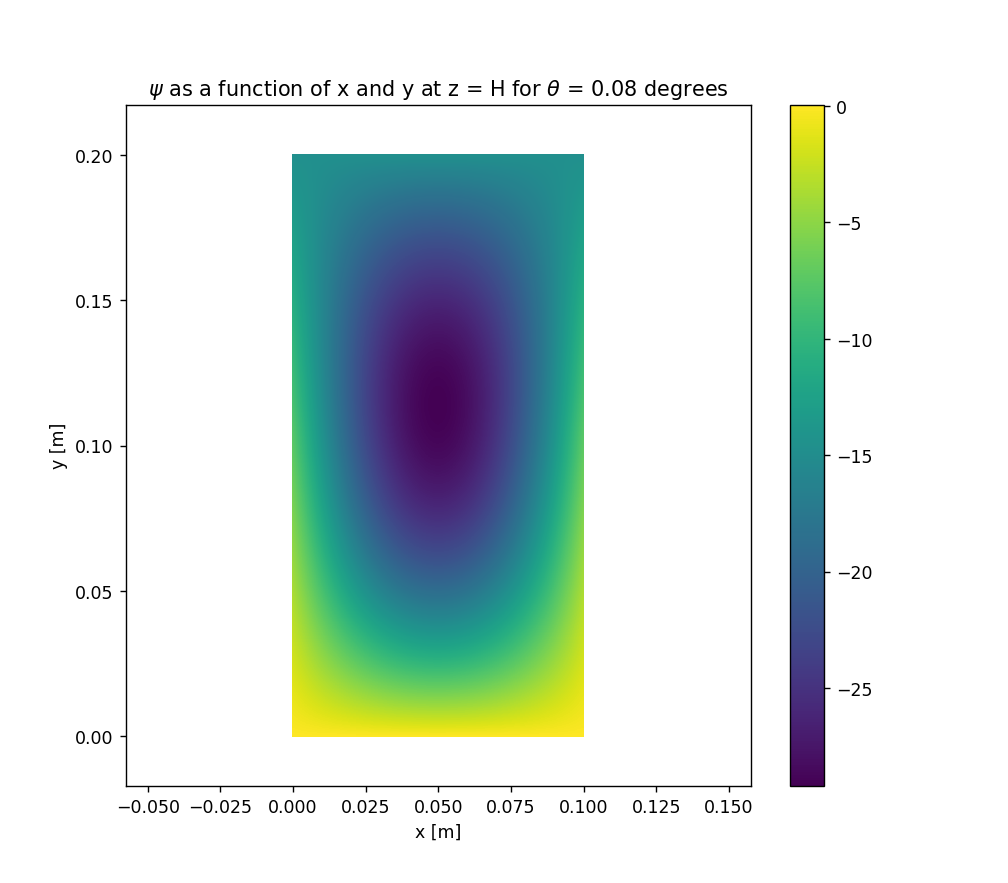

In [99]:
theta_deg = .08
theta = theta_deg*(pi/180)
Esq_xy = get_Esq(Xmesh, Ymesh, z=H, theta=theta)
Esq_xy_no_plasma = get_Esq_no_plasma(Xmesh, Ymesh, z=H, theta=theta)
Esq_homodyne = get_Esq_homodyne(Xmesh, Ymesh, z=H, theta=theta)

<IPython.core.display.Javascript object>


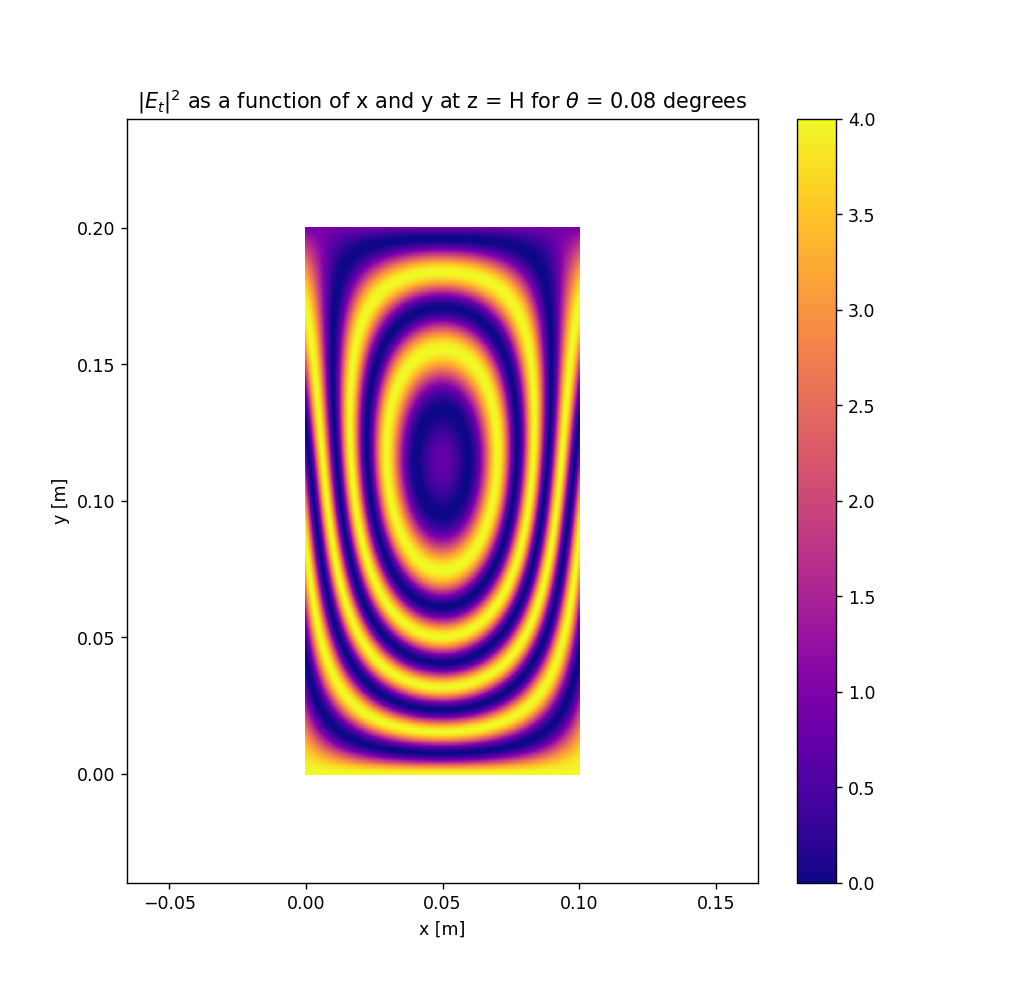

Text(0.5, 1.0, '$|E_t|^2$ as a function of x and y at z = H for $\\theta$ = 0.08 degrees')

In [100]:
plt.pcolor(Xmesh, Ymesh, Esq_xy, cmap='plasma')
plt.axis('equal')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(r'$|E_t|^2$ as a function of x and y at z = H for $\theta$ = '+ f'{theta_deg} degrees')

<IPython.core.display.Javascript object>


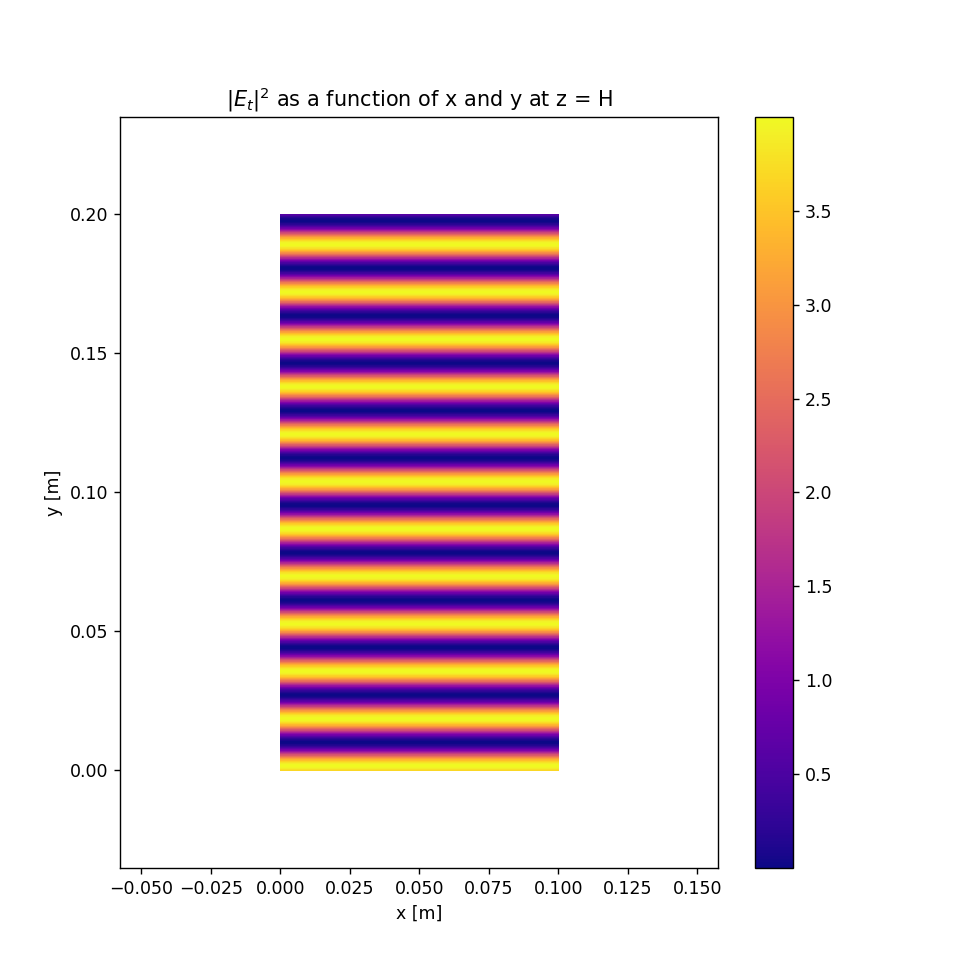

Text(0.5, 1.0, '$|E_t|^2$ as a function of x and y at z = H')

In [81]:
plt.pcolor(Xmesh, Ymesh, Esq_xy_no_plasma, cmap='plasma')
plt.axis('equal')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(r'$|E_t|^2$ as a function of x and y at z = H')

<IPython.core.display.Javascript object>


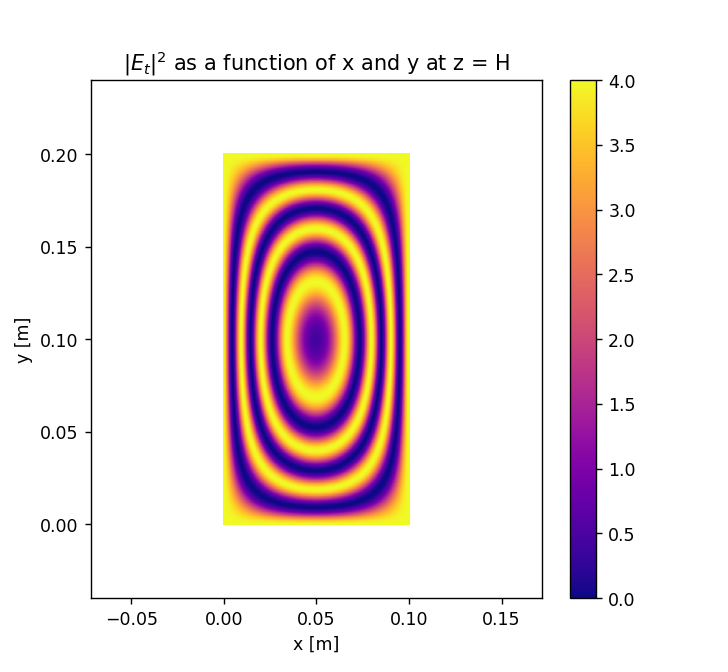

Text(0.5, 1.0, '$|E_t|^2$ as a function of x and y at z = H')

In [38]:
plt.pcolor(Xmesh, Ymesh, Esq_homodyne, cmap='plasma')
plt.axis('equal')
plt.colorbar()
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.title(r'$|E_t|^2$ as a function of x and y at z = H')

<IPython.core.display.Javascript object>


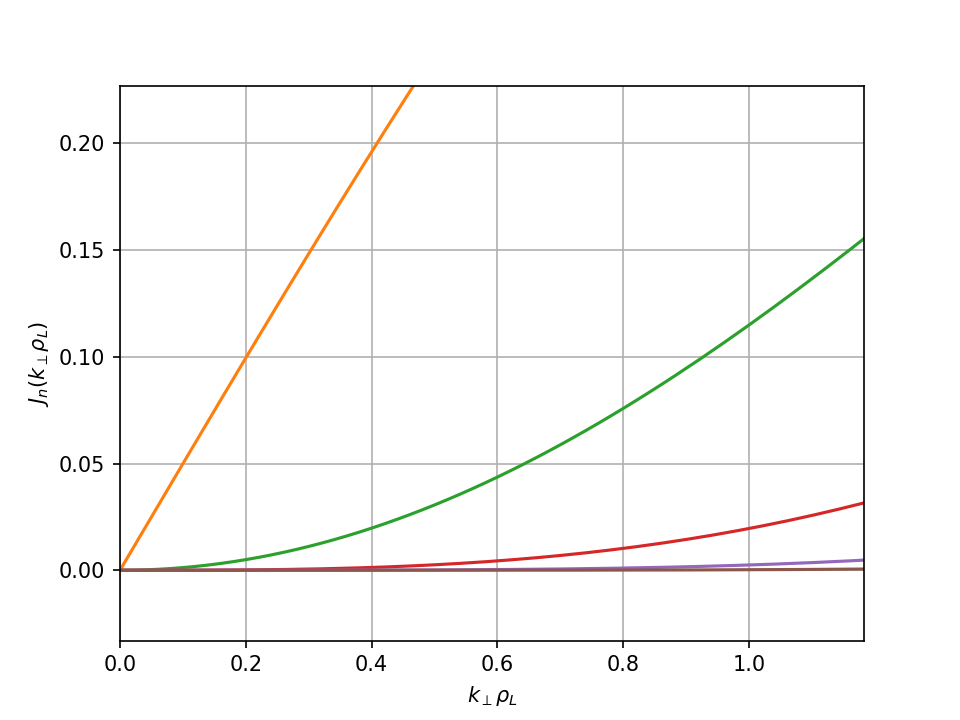

In [11]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
%matplotlib notebook
# plt.matplotlib.rc('text', usetex = True)
# plt.matplotlib.rc('grid', linestyle = 'dotted')
# plt.matplotlib.rc('figure', figsize = (6.4,4.8)) # (width,height) inches
x = np.linspace(0, 10, 500)
for v in range(0, 6):
    plt.plot(x, sp.jv(v, x))
plt.xlim((0, 10))
plt.ylim((-0.5, 1.1))
plt.xlabel(r'$k_{\perp} \rho_L$')
plt.ylabel(r'${J}_n(k_{\perp} \rho_L)$')
plt.grid(True)
#plt.tight_layout(0.5)